In [22]:
import sys
import pandas as pd
import os
import seaborn as sns
cur=os.getcwd()
par=os.path.dirname(cur)
sys.path.insert(0,par)
from scripts.classes import FinancialAnalyzer

In [23]:
sentiment=pd.read_csv('C:/Users/abenet/Desktop/data/sentiment.csv')
analyzer=FinancialAnalyzer('AAPL','2020-01-01','2020-12-30')
data=analyzer.ticker_data()
sentiment

,Unnamed: 0,date,sentiment
0,0,2020-03-09,-0.302067
1,1,2020-03-10,-0.090787
2,2,2020-03-11,-0.023850
3,3,2020-03-12,-0.078360
4,4,2020-03-13,-0.059727
...,...,...,...
75,75,2020-05-31,-0.085950
76,76,2020-06-01,-0.305667
77,77,2020-06-02,-0.408683
78,78,2020-06-09,0.246900


In [24]:
merged_data=sentiment.merge(data,left_on='date',right_on='Date')
merged_data['date']=pd.to_datetime(merged_data['date'])
merged_data=merged_data.drop(['Unnamed: 0','Date'],axis=1)
merged_data['pct_close']=merged_data['Close'].pct_change()
merged_data['pct_sentiment']=merged_data['sentiment'].pct_change()
merged_data.dropna(inplace=True)
merged_data

,date,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,pct_close,pct_sentiment
1,2020-03-10,-0.090787,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.000,0.0,0.072022,-0.699445
2,2020-03-11,-0.023850,69.347504,70.305000,67.964996,68.857498,66.988190,255598800,0.000,0.0,-0.034731,-0.737299
3,2020-03-12,-0.078360,63.985001,67.500000,62.000000,62.057499,60.372791,418474000,0.000,0.0,-0.098755,2.285535
4,2020-03-13,-0.059727,66.222504,69.980003,63.237499,69.492500,67.605965,370732000,0.000,0.0,0.119808,-0.237784
5,2020-03-16,0.044191,60.487499,64.769997,60.000000,60.552502,58.908657,322423600,0.000,0.0,-0.128647,-1.739878
6,2020-03-17,-0.006300,61.877499,64.402496,59.599998,63.215000,61.498871,324056000,0.000,0.0,0.043970,-1.142563
7,2020-03-18,-0.077400,59.942501,62.500000,59.279999,61.667500,59.993385,300233600,0.000,0.0,-0.024480,11.285714
8,2020-03-19,0.191300,61.847500,63.209999,60.652500,61.195000,59.533710,271857200,0.000,0.0,-0.007662,-3.471576
9,2020-03-20,0.434450,61.794998,62.957500,57.000000,57.310001,55.754189,401693200,0.000,0.0,-0.063486,1.271040
10,2020-03-23,-0.185850,57.020000,57.125000,53.152500,56.092499,54.569725,336752800,0.000,0.0,-0.021244,-1.427782


In [25]:
merged_data=analyzer.technical_indicators(merged_data)

<Axes: >

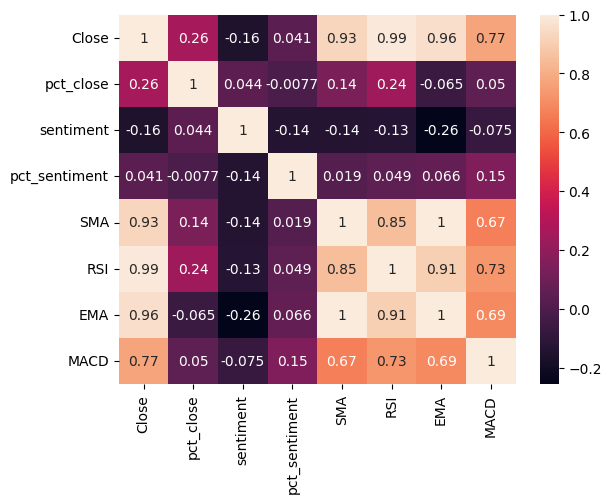

In [26]:
corr=merged_data[['Close','pct_close','sentiment','pct_sentiment','SMA','RSI','EMA','MACD']].corr()
sns.heatmap(corr,annot=True)

c:\Users\abenet\Desktop\Trial\AIM-Week_1\scripts\classes.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


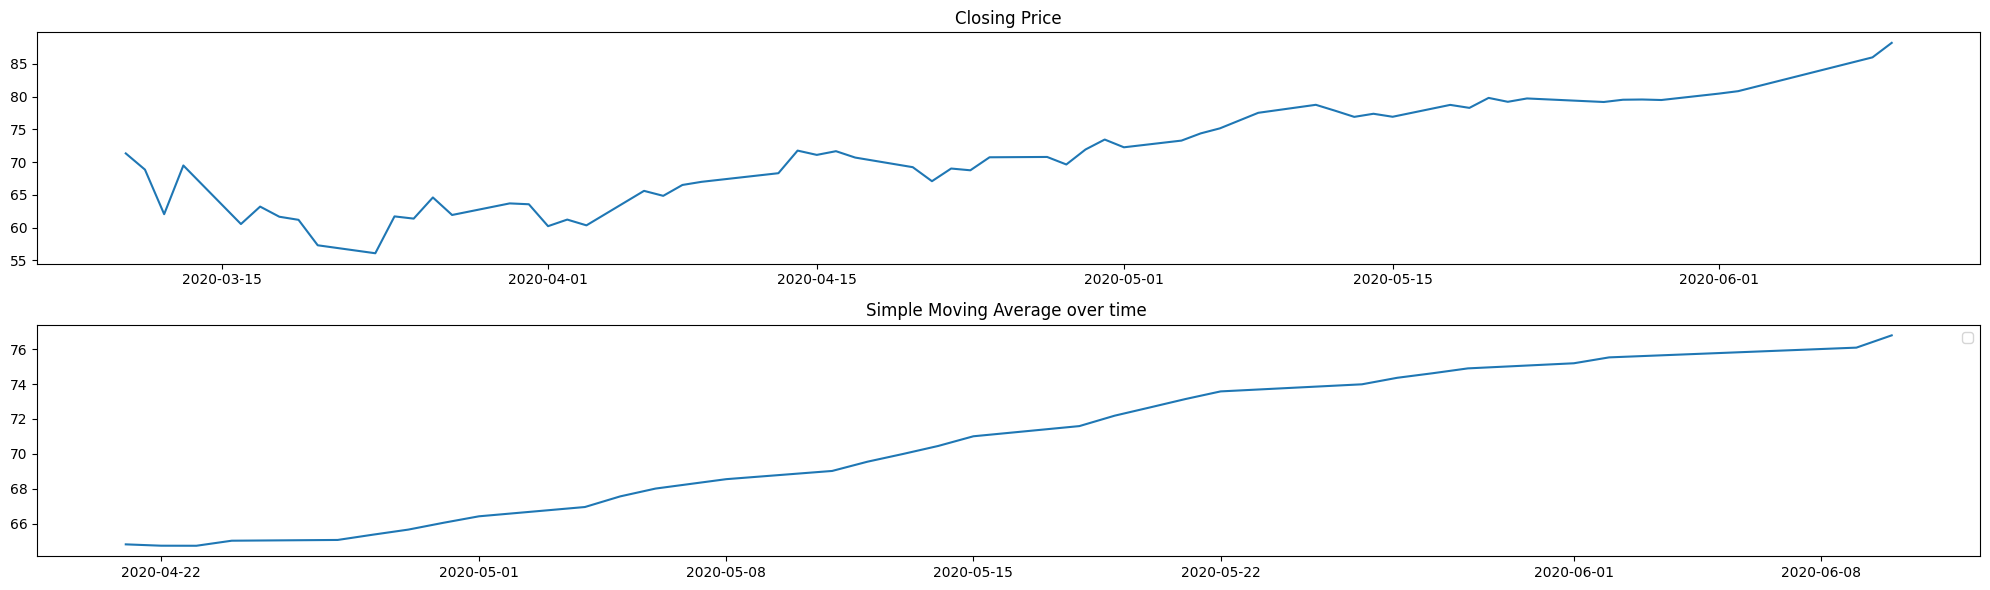

In [27]:
analyzer.plot_sma(merged_data);

c:\Users\abenet\Desktop\Trial\AIM-Week_1\scripts\classes.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


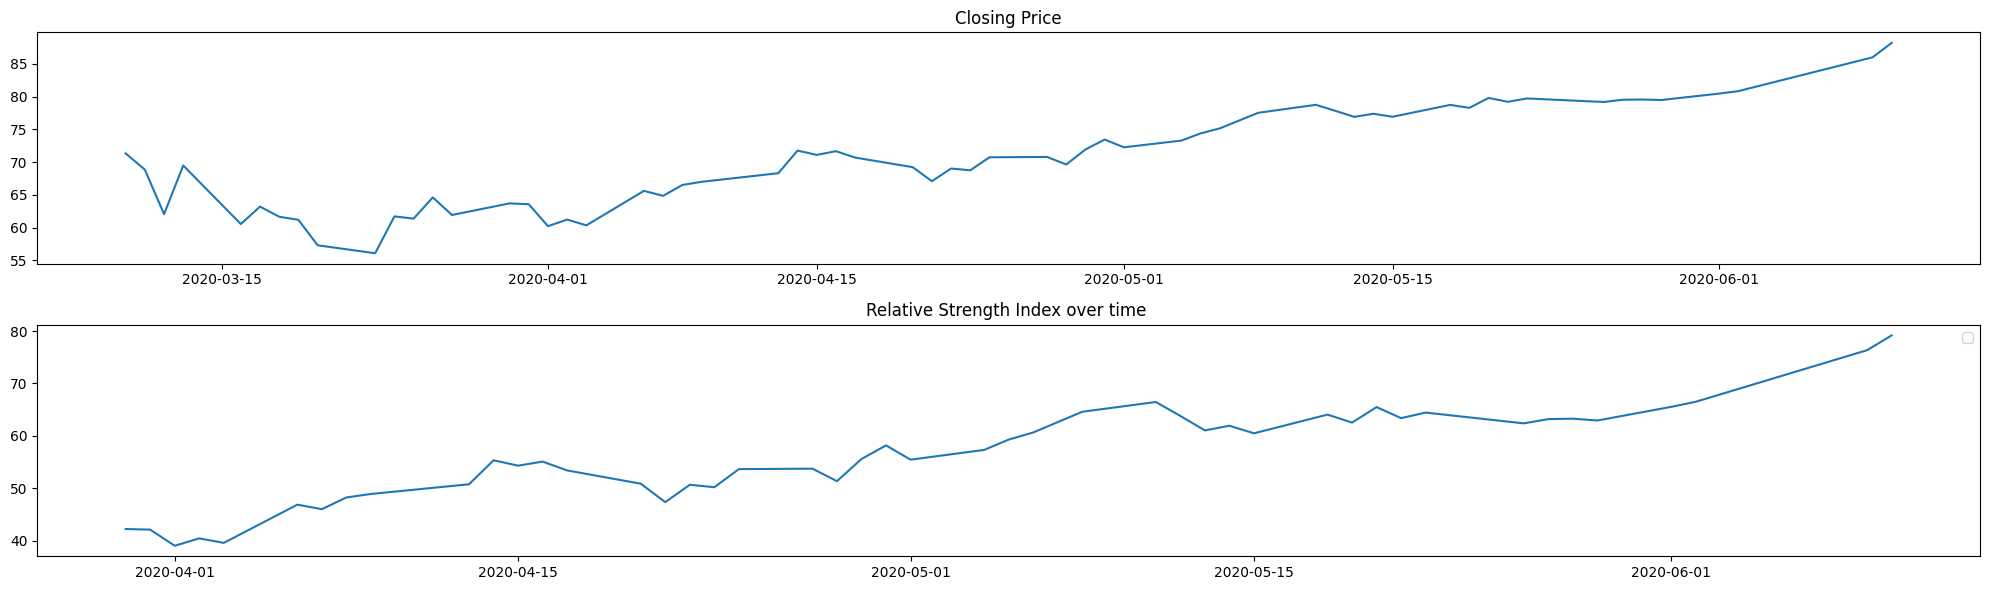

In [28]:
analyzer.plot_rsi(merged_data);

c:\Users\abenet\Desktop\Trial\AIM-Week_1\scripts\classes.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


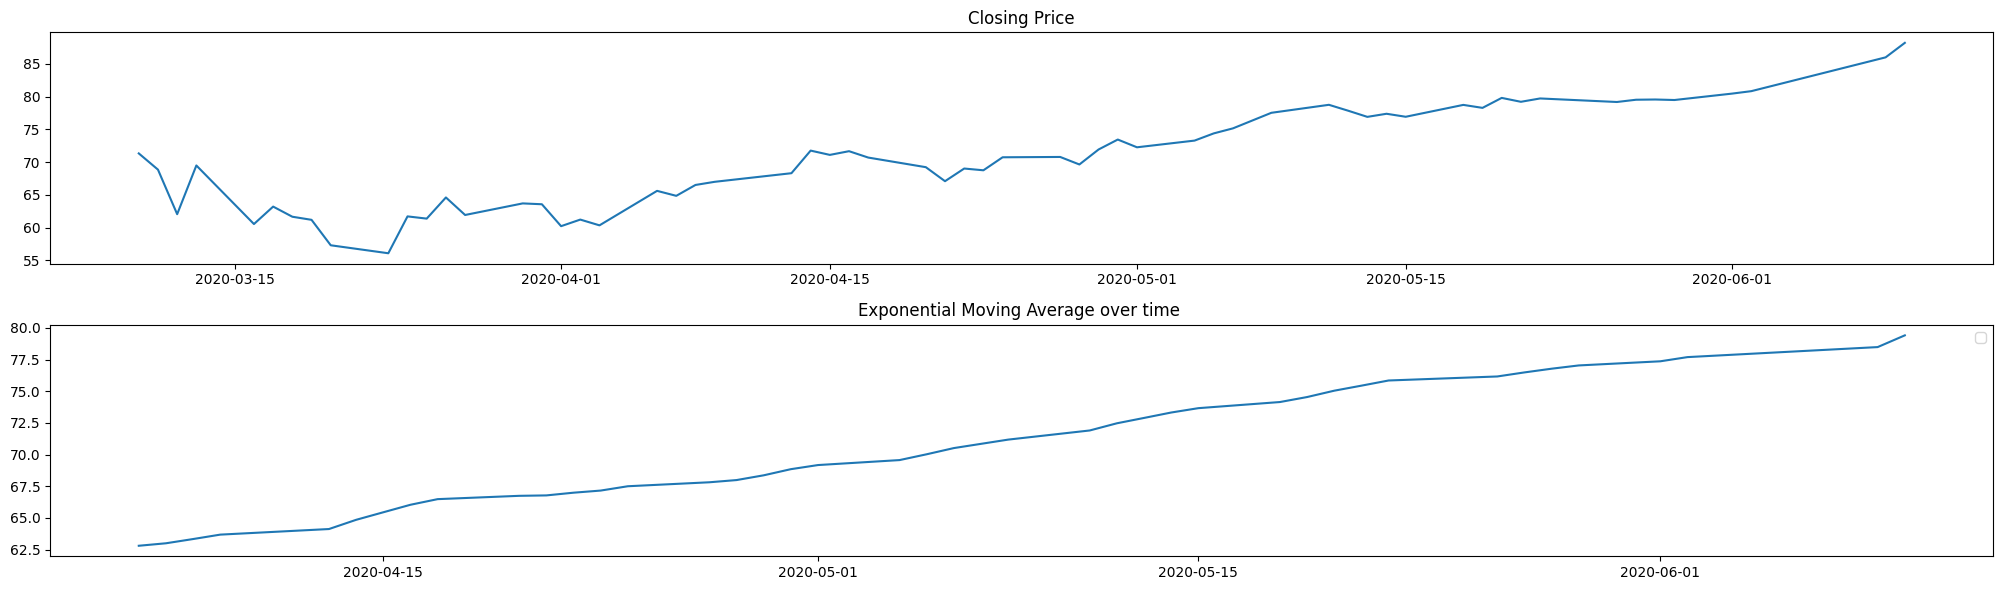

In [29]:
analyzer.plot_ema(merged_data);

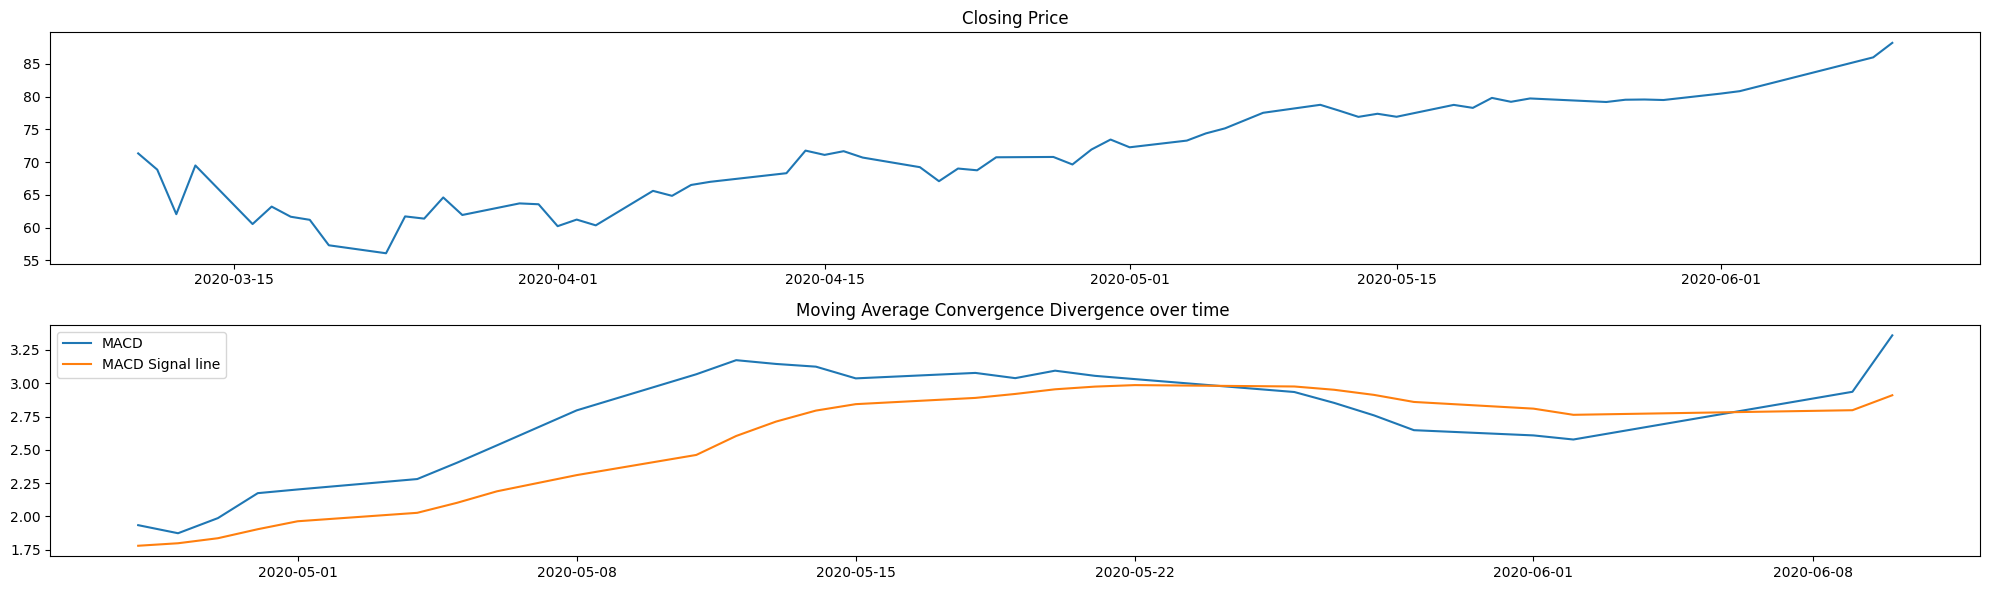

In [30]:
analyzer.plot_macd(merged_data);